## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read the dataset

df = pd.read_csv('hotel_bookings.csv')

Explore the dataset using head, tail, describe and null values

In [3]:
# Head gives the top 5 entries which gives the overview of the dataset.

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Tail gives the last 5 entries from which we get a more clear picture about the the dataset.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
#  Shape gives the total entries of rows with their respective columns.

df.shape

(119390, 32)

In [6]:
df_copy = df.copy()


In [7]:
# Lets check the total null values in our dataset.

df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# check the total number of duplicate values

len(df[df.duplicated()])

31994

In [9]:
# Drop the duplicates

df = df.drop_duplicates()

In [10]:
# Since the columns agent and company contains maximum number of null values so dropping these columns won't affect our dataset.

df = df.drop(['agent','company'] , axis=1)

In [11]:
# Our final dataset contains 86940 rows with 30 columns

df.shape

(87396, 30)

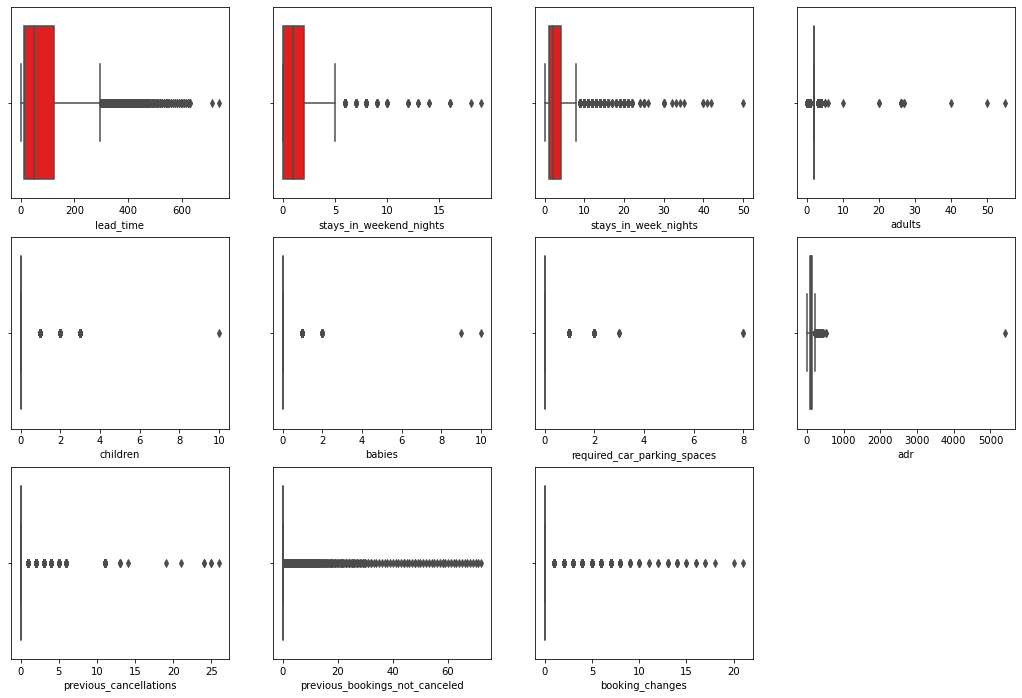

In [12]:
# we will deal with outliers using boxplot.

# In variable numeric_columns we stored the list of columns with numeric values

numeric_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces',
           'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']

# We apply the for loop on numeric_columns to get outliers using boxplot

plt.figure(figsize=(18,12))
n = 1
for column in numeric_columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column], color= 'Red')
plt.show()

In [13]:
# Update the outliers with some specific values
# With loc() function we access the particular rows and columns and replace them with some range value

df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.stays_in_weekend_nights >=  6, 'stays_in_weekend_nights'] = 6
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.children > 8, 'children'] = 0
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5

In [14]:
# Here we Replaced the values of 0 and 1 with string values for better understanding.

df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest']= df.is_repeated_guest.replace([1,0] , ['repeated_guest','not a repeated guest'])

Let's understand the various factors (mean, mediun, max, etc.) values of all the columns.

In [15]:
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,87396.000000,87396,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,not_canceled,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,63371,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,46313,NaN,86251,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,NaN,79.627500,2016.210296,NaN,26.838334,15.815541,1.001659,2.600863,1.872008,...,NaN,0.266282,NaN,0.749565,NaN,106.286901,0.084043,0.698567,NaN,NaN
std,NaN,NaN,84.888564,0.686102,NaN,13.674572,8.835146,1.005681,1.892669,0.511331,...,NaN,0.666588,NaN,10.015731,NaN,52.105898,0.278975,0.831946,NaN,NaN
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


 **Some of the rough estimations by describe method are as follows:**

1.  Maximum number of bookings are done for city hotels.
2.  On an avarage, 2016 is the year in which most of the bookings are made.
3.  August is the month with maximum bookings.
4.  People tend to stay on week nights than on weekend nights.
5.  Portugal is the country with maximum customer base.

***Univariate***


***Numeric columns and Categorial columns***



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  object 
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [17]:
# Numeric columns 
numeric_columns =  df.describe().columns  # describe.columns method will display all the numeric i.e. int and float type columns 
print(numeric_columns)
print(len(numeric_columns))  # It will give the length of all these columns.

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')
16


**Lets visualize some of the numeric columns out of 16 to get some insights!**

**1. is_canceled**

([<matplotlib.patches.Wedge at 0x1d921d77610>,
 [Text(-0.8362179823011787, -0.7146603991240494, 'not_canceled'),
  Text(0.912237798874013, 0.7796295263171452, 'canceled')],
 [Text(-0.4561188994370065, -0.3898147631585724, '72.5%'),
  Text(0.5321387160098409, 0.45478389035166805, '27.5%')])

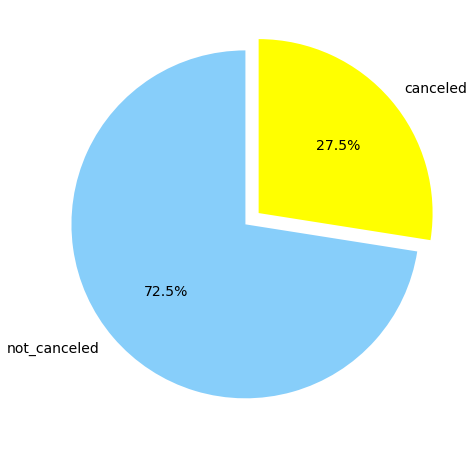

In [18]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['is_canceled'].value_counts().index.tolist()   # Here,the variable lables will give all lables present in the column,and here lables are ['not_canceled', 'canceled'].
sizes = df['is_canceled'].value_counts().tolist() # Variable sizes will give the actual count of both the lables present in the column,is_canceled.
explode = (0, 0.1)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})  # Here,pie chart will give pictorial presentation of the lables in the column.

**2. Arrival date year**

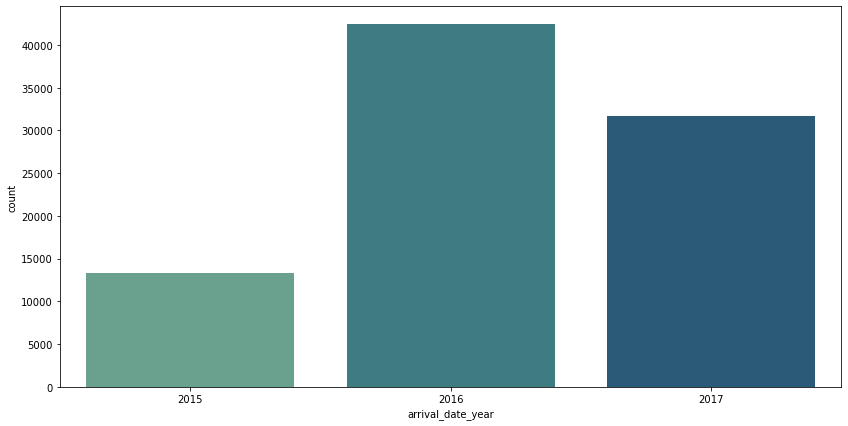

In [19]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='crest')  # The countplot will give plot of arrival date year wrt to the count
plt.show()

**3. booking_changes**

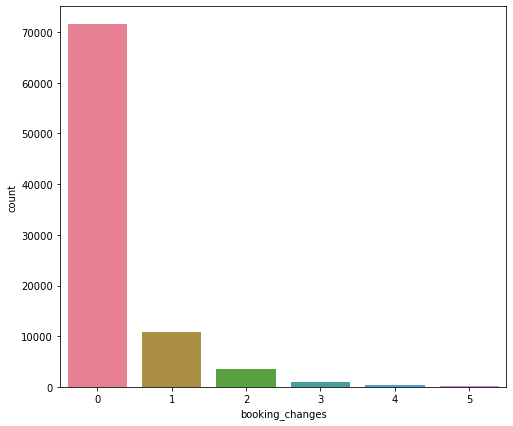

In [20]:
plt.figure(figsize=(8,7))
sns.countplot(df['booking_changes'], palette='husl')  # The countplot will give plot of booking changes wrt to the count
plt.show()

**4. required_car_parking_spaces**

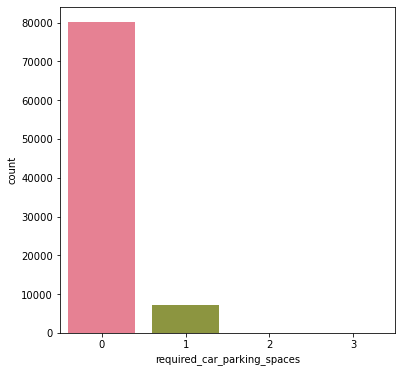

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

**These above were some of the visualizations of numeric columns**

**Now lets look into Categorical columns** 

In [22]:
categorical_columns= df.describe(include=['object']).columns   # Here,describe include object type, which gives all the categorical columns
print(categorical_columns)
print(len(categorical_columns))  

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')
14


**14 columns are categorical**

**Here,we plotted pie chart of the hotel column to know which hotel is more prefered**

([<matplotlib.patches.Wedge at 0x1d9220e7310>,
 [Text(-1.0334002052130253, -0.3769403346229713, 'City Hotel'),
  Text(1.127345716914242, 0.41120753222079226, 'Resort Hotel')],
 [Text(-0.5636728392071046, -0.20560381888525703, '61.1%'),
  Text(0.6576183348666411, 0.2398710604621288, '38.9%')])

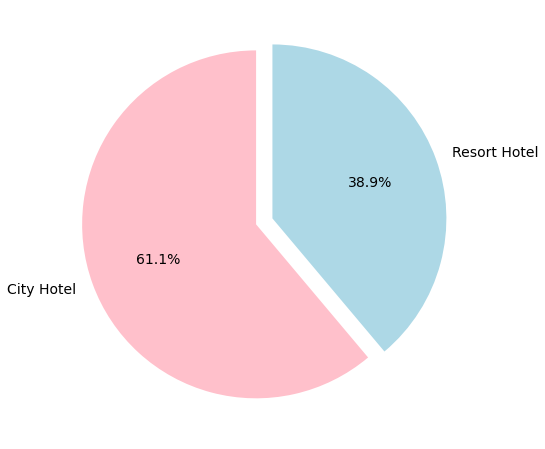

In [23]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()   # Lables will give the names of the lables present in the columns and here lables are ['City_Hotel, Resort_Hotel]
sizes = df['hotel'].value_counts().tolist()         # Sizes will gives the count of respective lables
explode = (0, 0.1)
colors = ['pink','lightblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14}) #pie chart presentation

In [24]:
# Now to plot all other categorical columns we created a variable cc1 in which we stored the list of the remaining categorical columns 

cc1 = ['hotel', 'is_canceled', 'arrival_date_month', 'meal',
       'market_segment', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status']

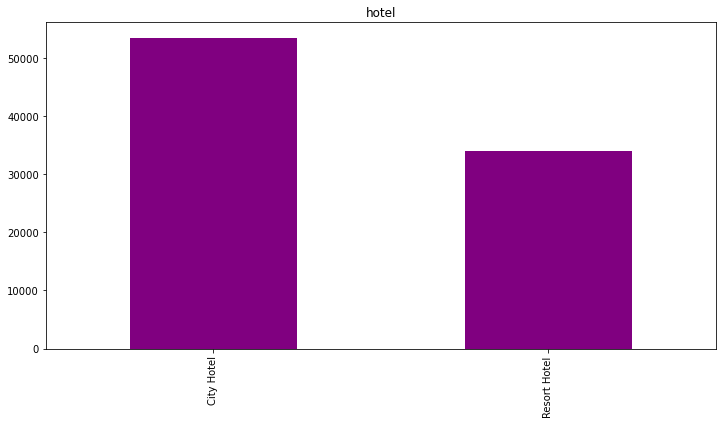

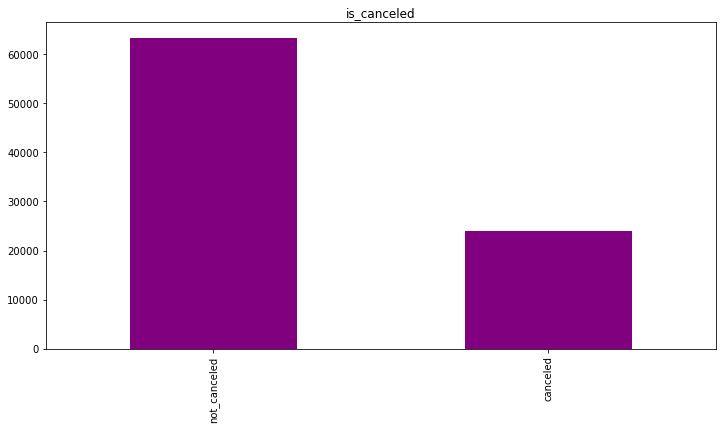

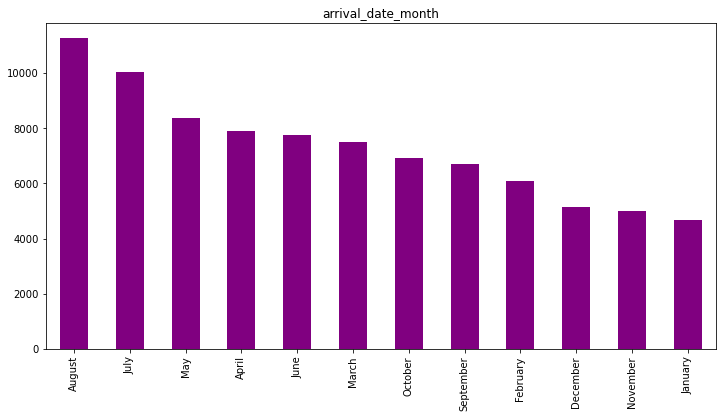

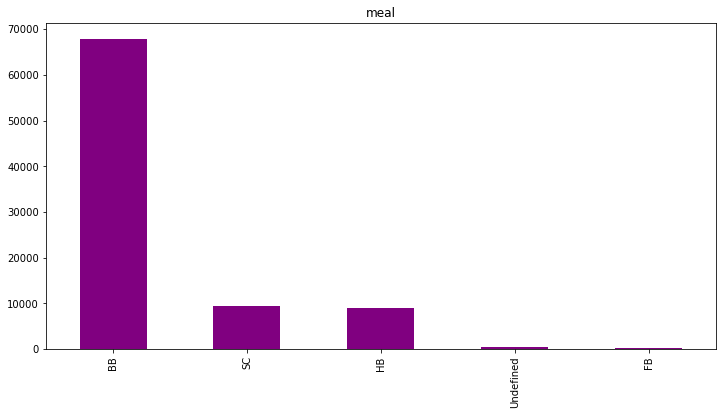

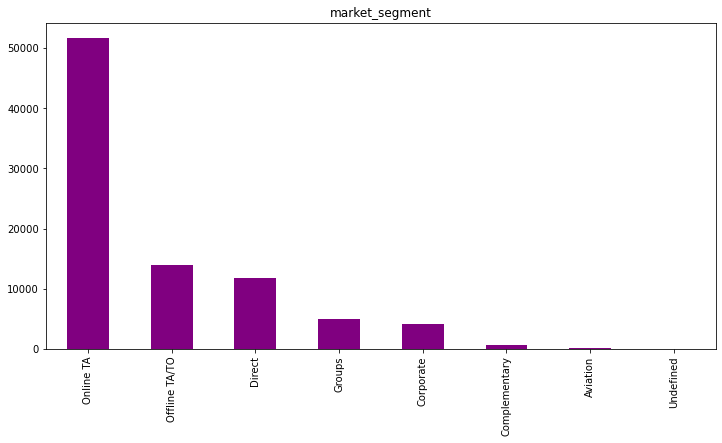

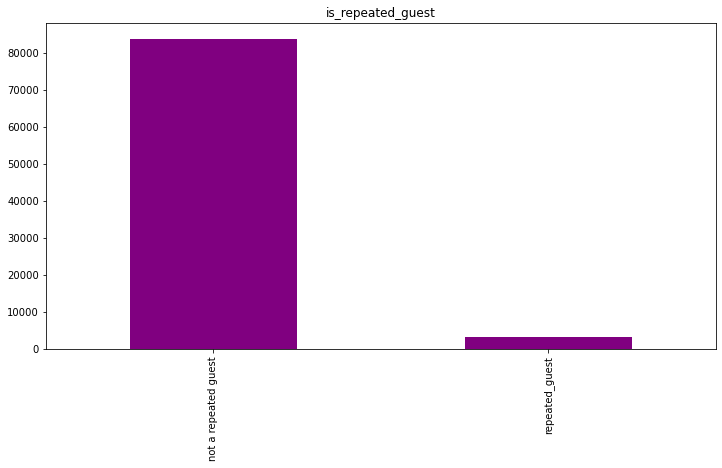

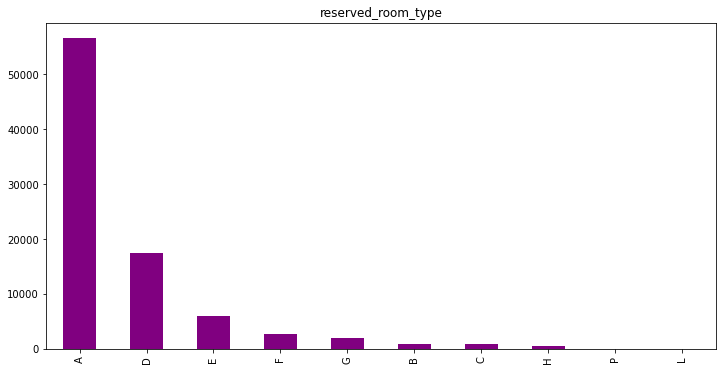

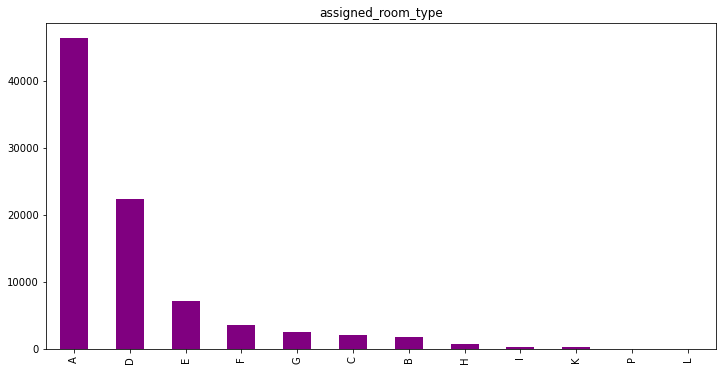

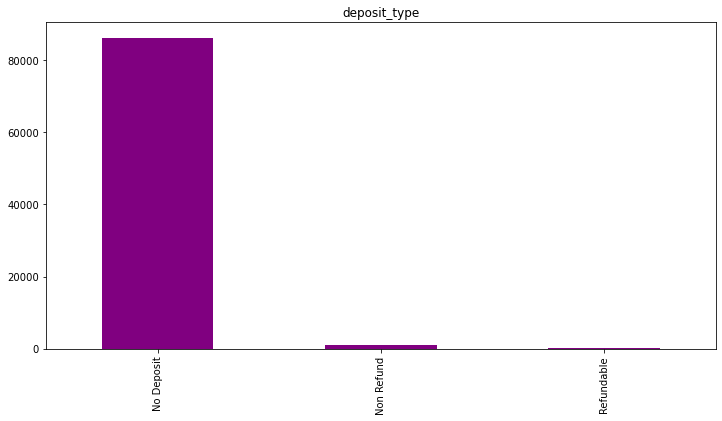

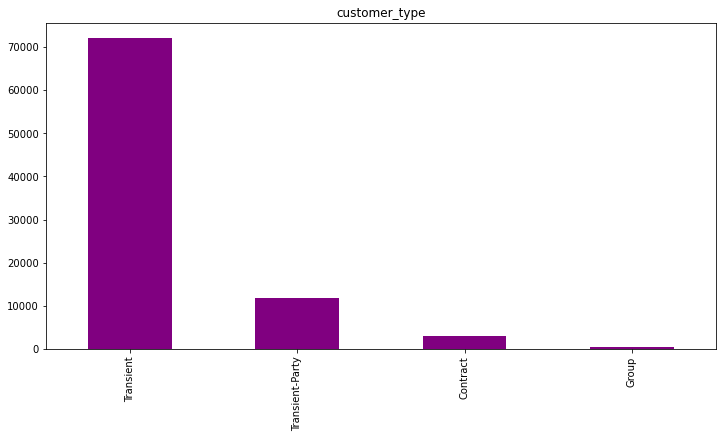

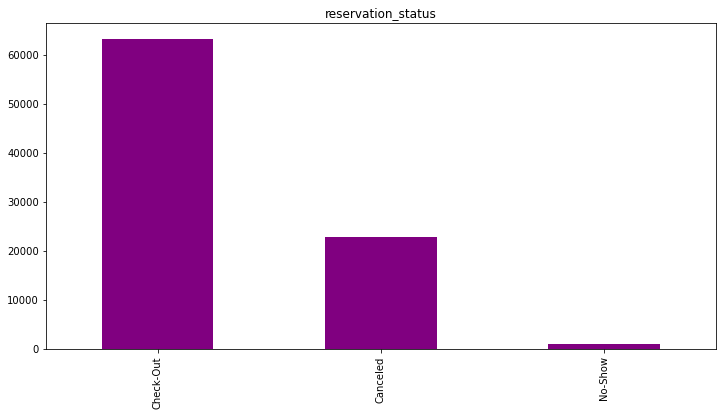

In [25]:
# Here we run a for loop on cc1 and plotted a bar plot for all the columns

for column in cc1:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  df[column].value_counts().plot(kind = 'bar', title=column,color = 'purple')

plt.show()

**Percentage of some of the univariate columns to get clear insights**

In [26]:
# reserved room type
df.reserved_room_type.value_counts(normalize=True)*100

A    64.707767
D    19.907090
E     6.921369
F     3.230125
G     2.347934
B     1.143073
C     1.046959
H     0.681953
P     0.006865
L     0.006865
Name: reserved_room_type, dtype: float64

In [27]:
#assigned rooms
df.assigned_room_type.value_counts(normalize=True)*100

A    52.992128
D    25.667079
E     8.232642
F     4.150076
G     2.858254
C     2.477230
B     2.082475
H     0.807817
I     0.408486
K     0.315804
P     0.006865
L     0.001144
Name: assigned_room_type, dtype: float64

In [28]:
# distribution channel
df.distribution_channel.value_counts(normalize=True)*100

TA/TO        79.112316
Direct       14.861092
Corporate     5.813767
GDS           0.207103
Undefined     0.005721
Name: distribution_channel, dtype: float64

In [29]:
# preferred type of meal

df.meal.value_counts(normalize=True)*100

BB           77.781592
SC           10.848323
HB           10.395213
Undefined     0.562955
FB            0.411918
Name: meal, dtype: float64

In [30]:
# Guest arrival per month

df.arrival_date_month.value_counts(normalize=True)*100  


August       12.880452
July         11.507392
May           9.559934
April         9.048469
June          8.884846
March         8.596503
October       7.934002
September     7.654813
February      6.977436
December      5.870978
November      5.715365
January       5.369811
Name: arrival_date_month, dtype: float64

***With univariates we conclude the following:***

1.  66% is City Hotel and 34% is Resort Hotel with Most hotels were booked in year 2016 and least number of hotels were booked in year 2015.

2. Most of the market_segment used is Online TA and Offline TA/TO,Almost half of the bookings are made via Online Travel Agents,some of the bookings are made via Offline Travel Agents and rest are Direct bookings without any other agents.

4. almost 80% distribution_channel is occupied by TA/TO

5. 64% guest book room type A but only 53% is actually assigned the same room

6. almost 28% of the reservations are cancelled by the guests

7. Only 4% are repeated guest

8. 77% of the people prefer bed breakfast BB as their meal type during the stay

9. From the above data we can say that majority of the booking were not canceled.

10. August and july are the months with maximum bookings around 13% and 12% respectively, whereas november,december,january are least with around 5-6% of the total bookings


11. Some of the bookings were cancelled by guests with no deposit, followed by some bookings were canceled with Refundable. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations.

**Here we looked about all the univariate columns**

***Now,lets look into Bivariate analysis***

In [31]:
categorical_columns= df.describe(include=['object']).columns
print(categorical_columns)
print(len(categorical_columns))

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')
14


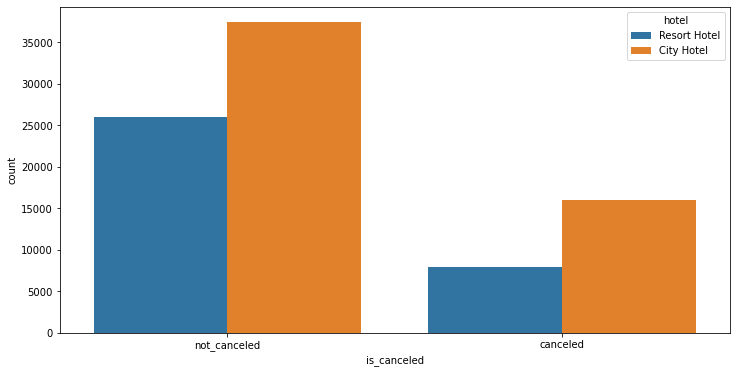

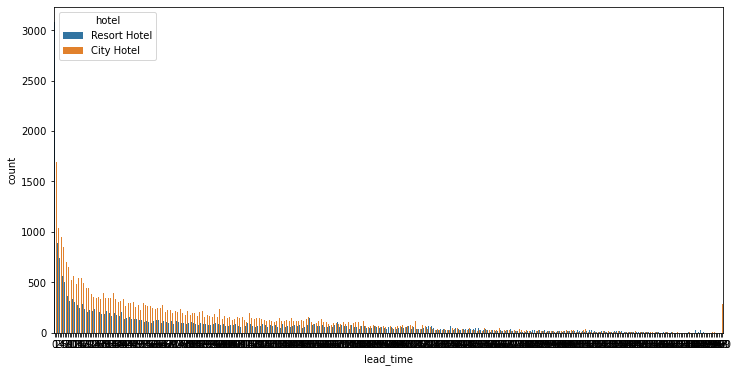

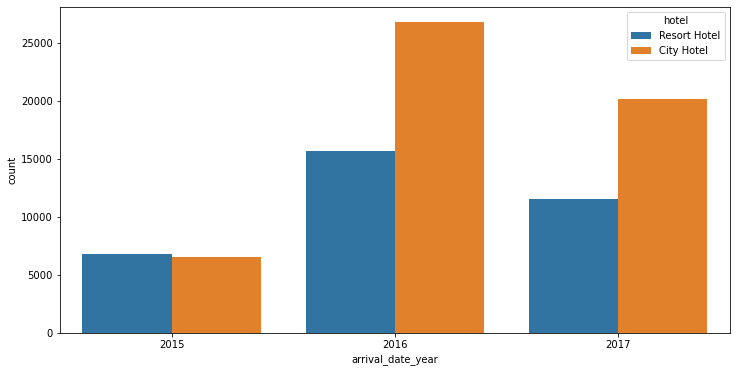

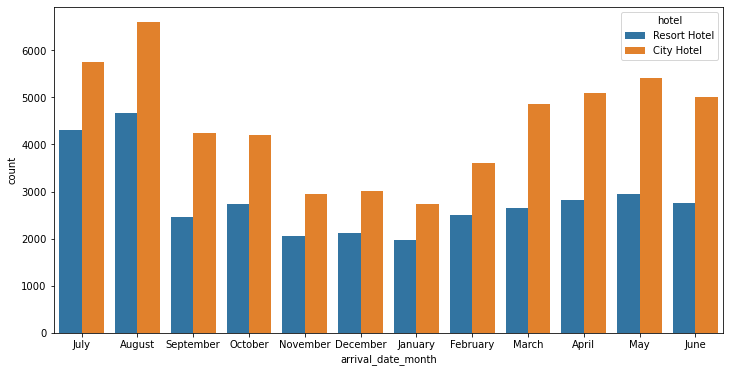

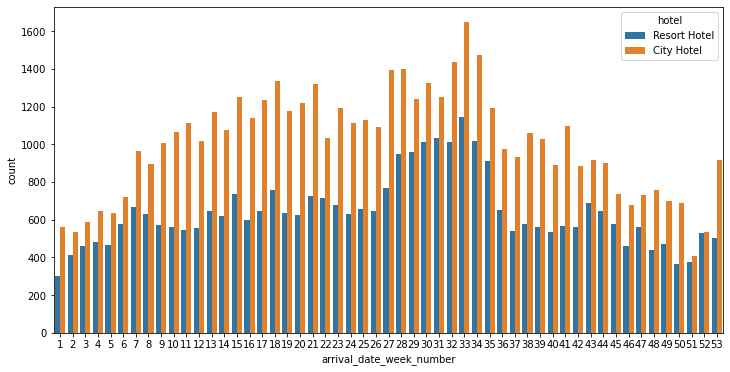

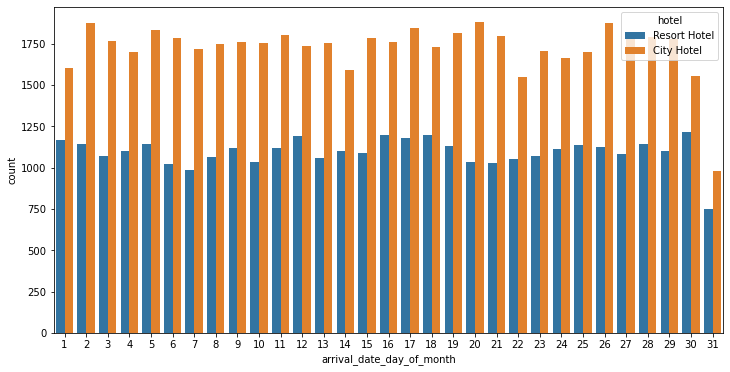

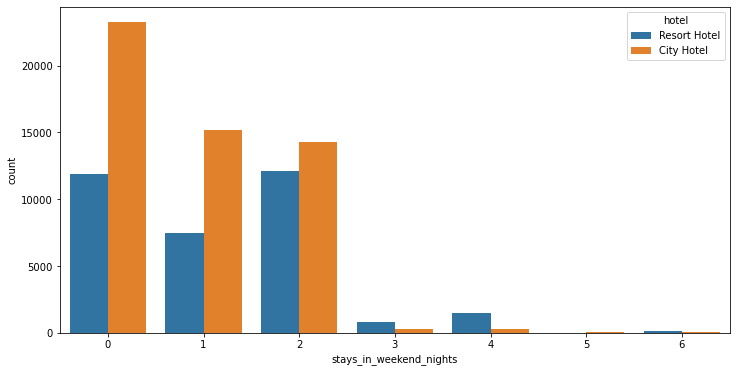

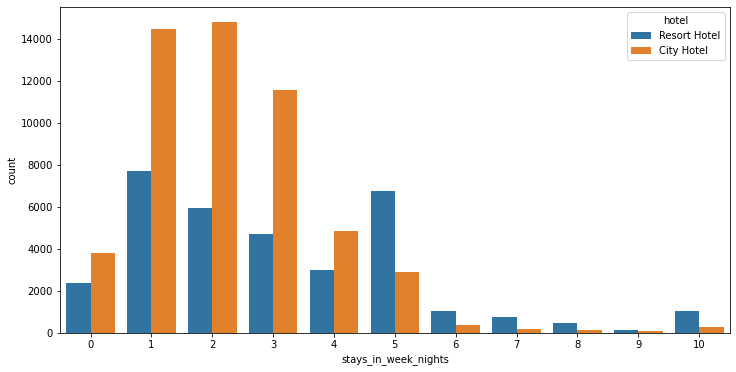

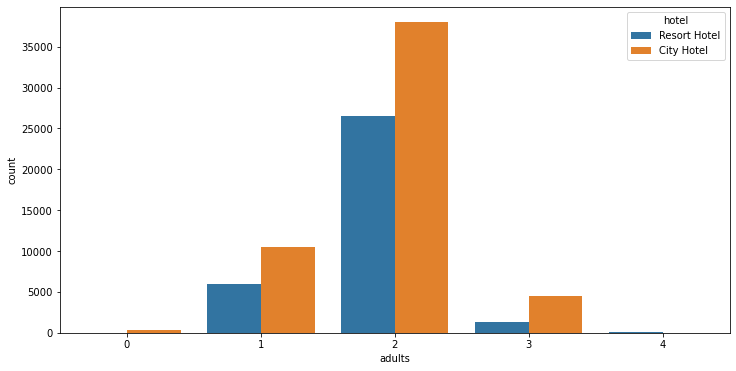

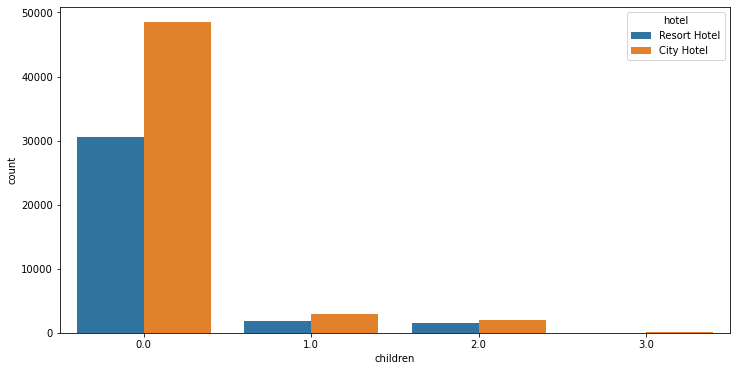

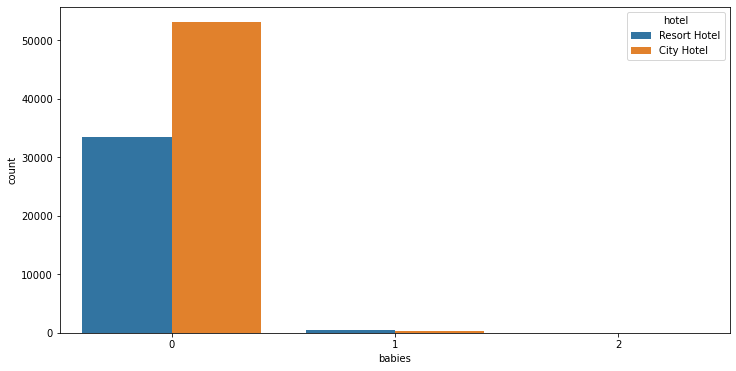

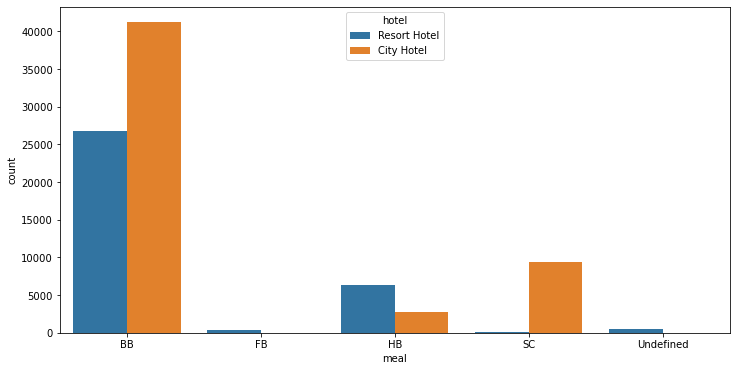

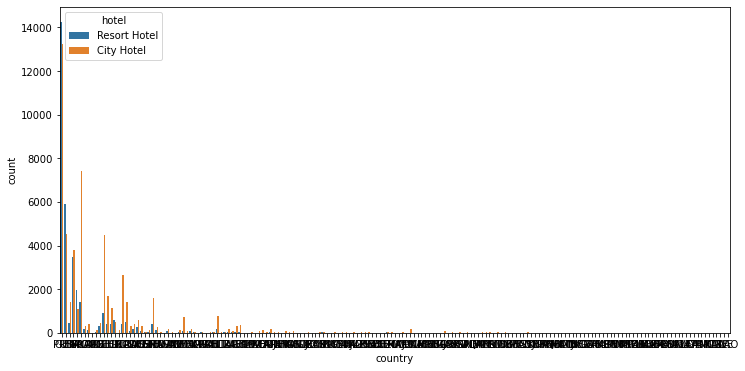

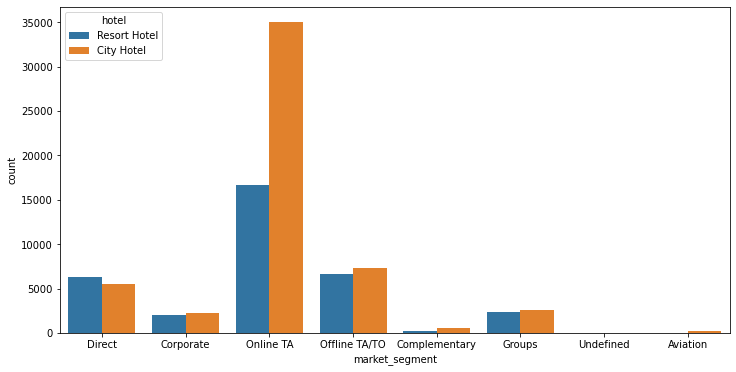

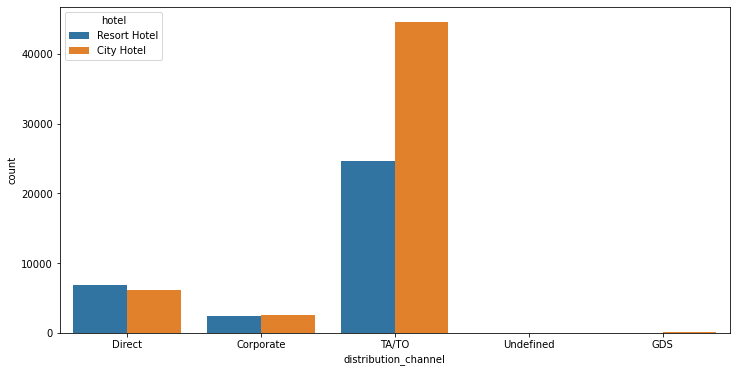

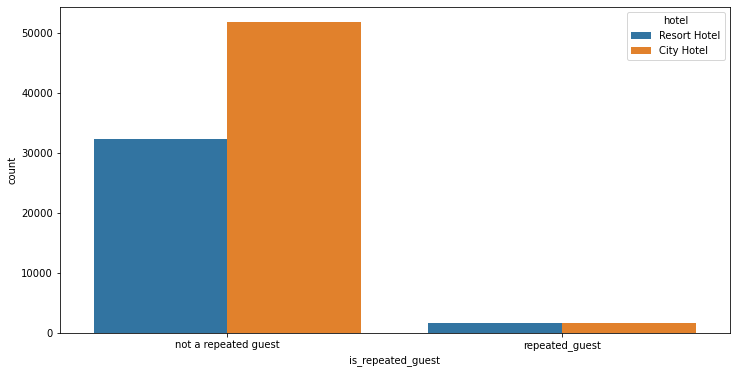

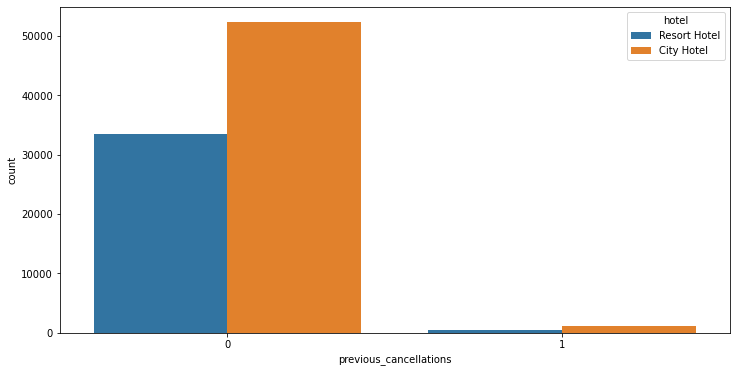

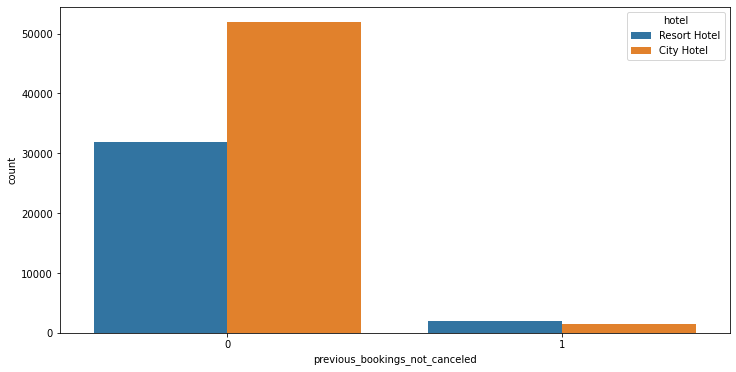

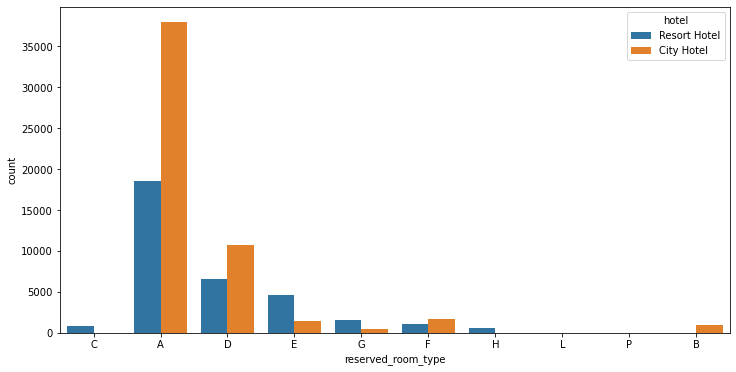

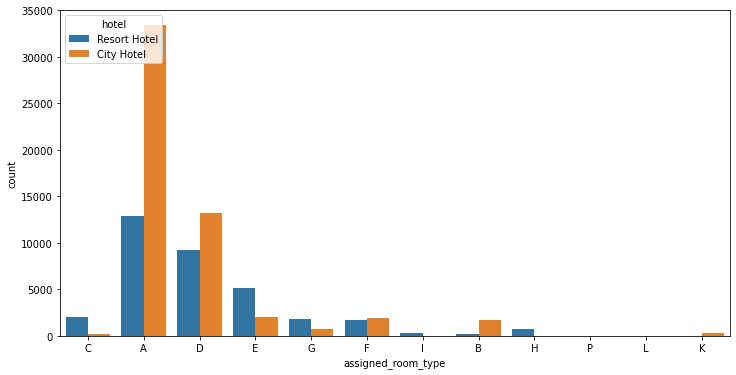

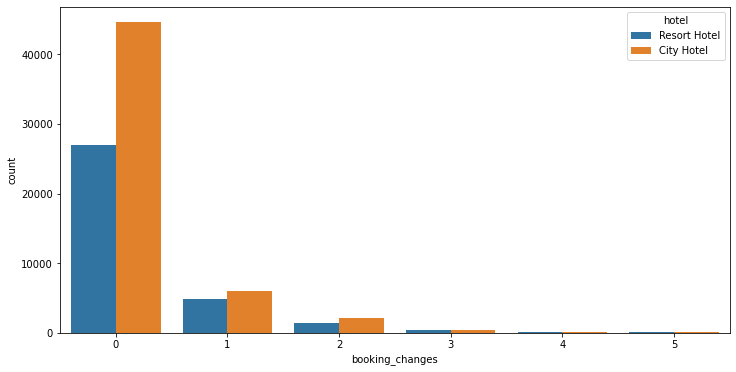

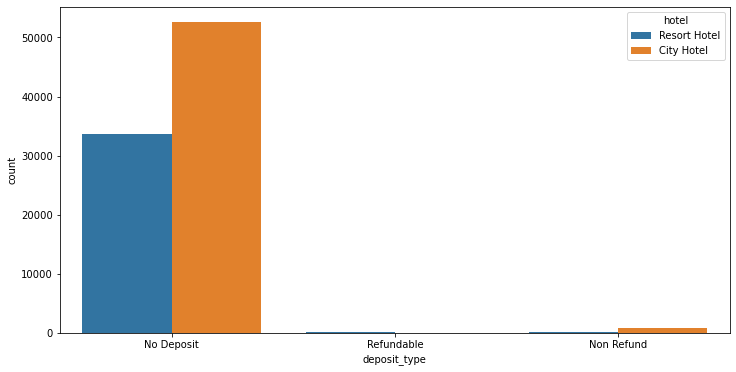

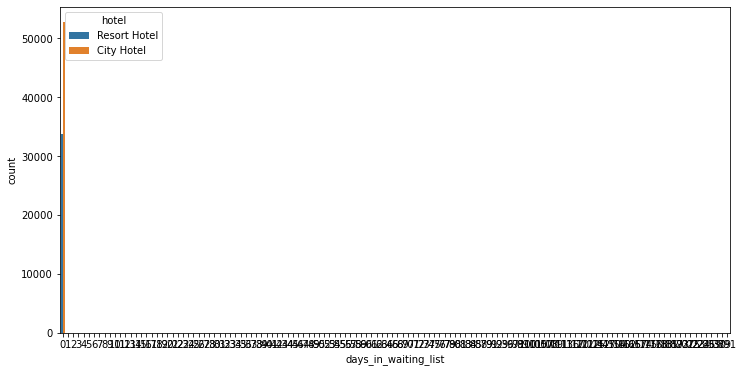

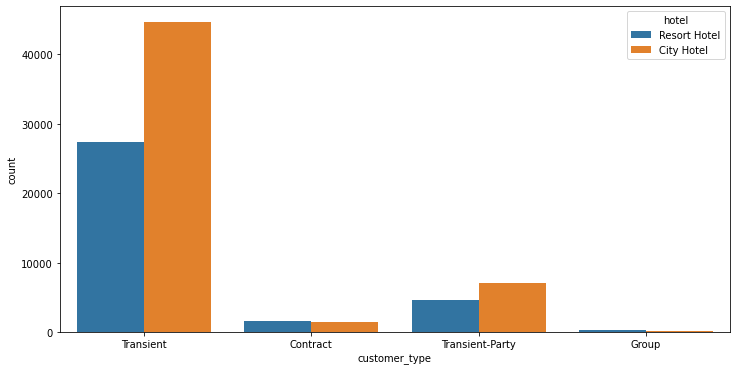

In [ ]:
for column in df.columns[1:]:
  fig= plt.figure(figsize=(12,6))
  ax= fig.gca()
  sns.countplot(df[column], x= column, hue=df['hotel'], ax= ax)
plt.show()

In [ ]:
# To show which month has highest booking in resort and city hotel

sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap = 'coolwarm')

# Bivariate conclusions

**Following are some of the observations from bivariate**

1.  From market_segment and distribution_channel we can observe that City Hotel is more into 'Online TA' and Resort Hotel is more into 'Direct' segment.

2. From the special requests we obsereve that no special request and 1 special requests are maximum in both types of hotels

3. Both the hotels have almost no deposit sections but City Hotel is more non-refund as compare to Resort Hotel

4. High percent of reservations are cancelled in city hotel as compared to resort hotel

5.  The above heatmap shows that City Hotel and Resort Hotel has the highest number of bookings in the month of August.




**Till here we dealt with univariates and bivariates, now we will look into some useful insights that will help our customer segment grow.**

**Some the hypothesis questions!!** 
1.   **Whether the booking is canceled by a repeated guest or not?**
2.   **Which type of hotels do other country people prefer, we look according to top 10 countries.**
3.   **How cancellations vary according to month?**
4.   **How cancellations vary accroding to hotel type?**
5.   **Do market segment has any impact on repeated guests?**
6.   **How reservation status and market segment affect each other?**
7.   **How special requests are directly affecting the cancellations?**
8.   **Customers prefer which night more, week or weekend?**
9.   **How confirmed bookings vary according to month**
10.  **How Waiting time vary for different market segments**
11.  **Countries with no cancallations/confirmed bookings according to country**
12.  **Countries with maximum cancallations**





**1.Whether the booking is canceled by a repeated guest or not?**

In [ ]:
df.groupby(['hotel','is_repeated_guest']).size().reset_index().value_counts()   # the count of repeated guests accoridng to hotel types

In [ ]:
# Plot of repeated guests and is canceled 

data = df[['is_canceled','is_repeated_guest']]

fig = plt.figure(figsize=(10,5))
sns.countplot(data=data , x = df['is_repeated_guest'] , hue = df['is_canceled'])
plt.title('is_canceled vs is_repeated')

*   We can clearly see that maximum number of bookings are canceled by the guests who booked the hotel for the first time, as percentage of canceled by repeated guest is almost zero so we conclude we reject our hypothesis
*   That means, the hotel booking that is canceled is very less likely to be canceled by a repeated guest.



**2.One of the good insights is to show which type of hotels do other country people prefer, we look according to top 10 countries.**

In [ ]:
# lets separate with the city type hotel 

type_city = df['hotel']=='City Hotel'

# here we sorted top 10 countries according to city type hotels

sort_city = df[type_city]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'},axis=1)

# here we sorted top 10 countries according to resort hotel

sort_resort =df[~type_city]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'},axis=1)

sort_city['hotel']  = 'City Hotel'
sort_resort['hotel'] =  'Resort Hotel'

# Now we will concat above two columns and assign it with df

df3 = pd.concat([sort_city, sort_resort]).reset_index()

# plot the barpot with count and hotel types

sns.barplot(x= 'country', y = 'count', data =df3 , hue="hotel")  


*   Despite maximum bookings are in city type hotel but we see that resort hotel type is maximum booked by the top 10 countries with Portugal having highest guests.


**3.How cancellations vary according to month?**

In [ ]:

df.arrival_date_month.value_counts().reset_index(name='count').rename({'index':'arrival_month'})


In [ ]:
df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack()

In [ ]:
# Here we groupby arrival_date_month with is_canceled to get booking variations accross the months and stored it in ax1
ax1=df.groupby('arrival_date_month')['is_canceled'].value_counts()  
ax1.plot(kind='bar')
plt.title('Bookings variations accross the months')

*   August is the month with maximum cancellations followed by July, May,June and April with lowest cancellations in January.


**4.How cancellations vary accroding to hotel type?**

In [ ]:
# Here we simply groupby two variables with single variable to plot piechart for clear vision about the hotel type and cancellations.

cancellations_by_month= df.groupby(['hotel','is_canceled'])['is_canceled'].count().plot(kind='pie' , autopct='%1.1f%%')

From the above plot we can conclude the following:

*   The cancellation percentage of City hotel is almost twice the cancellation percentage of Resort Hotel.
*   The booking percentage of City Hotel is quite large than that of Resort hotel.





**5.Do market segment has any impact on repeated guests?**

In [ ]:
# Total count of market segments according to is repeated guest column
df.groupby(['market_segment','is_repeated_guest'])['is_repeated_guest'].count().unstack()

In [ ]:
# Here we group by 3 columns to get the count as well as plot of market segment variation according to repeated guests
df.groupby(['market_segment','is_repeated_guest'])['is_repeated_guest'].count().plot(kind='bar' ,color = 'cyan' ,title = 'market segment variation according to count of repeated guests' )


1.It can be seen from the graph that, (online TA/TO) is a segment through which maximum bookings are done, followed by (offline TA/TO), groups, then direct, then corporate market segments.

2.Online (TA/TO) is a segment with less then 1% repeated guests out of the total bookings of online (TA/TO) and maximum bookings are by new guests from which we conclude that repeated guests don't prefer online(TA/TO).

3.Same goes with offline (TA/TO) and groups, they also have less then 2% of their total bookings with repeated guests, and all other with no repeated guests.

4.Thus from here we conclude, market segment do have an impact on repeated guests, though the segment with maximum bookings have barely any repeated guests.

**6.How reservation status and market segment affect each other?**

In [ ]:
fig= plt.figure(figsize=(10,5))

# Here we are dealing with only two columns i.e. reservation status and market segment thus our data will be these two columns, where on x axis reservation status and hue market segment
sns.countplot(data= df[['reservation_status', 'market_segment']], x= df['reservation_status'], hue=df['market_segment']).set_title('Reservation Status vs Market Segment', fontsize=20)
plt.show()



1.   Maximum bookings are either in check_out status or canceled status and are done by online TA.

2.   In comparisan with bookings made by online TA and offline TA/TO half of them are canceled, no refunds or some percent charges on cancellation can reduce this issue.



**7.How special requests are directly affecting the cancellations?**

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot( x='total_of_special_requests', hue='is_canceled', data=df)
plt.xticks(rotation = 0)
plt.title('special_requests_vs_How special requests are directly affecting the cancalations?')
plt.xlabel('number of special requests')
plt.ylabel('total_count')

*   Guest with 0 special requests are more likely to cancel the reservation.
*   As compared to 0 special requests, guests with 1 special request have very less percentage of cancellations.
*   Special requests with 2,3,4 numbers have almost zero cancelations.
*   Therefore, more the number of special requests, less are the number of cancellations.


**8.Customers prefer which night more, week or weekend?**

In [ ]:
df3= pd.DataFrame(df.groupby(['customer_type'])['stays_in_week_nights'].mean())
df3.plot.bar(figsize= (10, 5),color = 'pink')
plt.title('Customer type vs Stays on week nights', fontsize=20)
plt.show()
df3= pd.DataFrame(df.groupby(['customer_type'])['stays_in_weekend_nights'].mean())
df3.plot.bar(figsize= (10, 5))
plt.title('Customer Type vs Stays on weekend nights', fontsize=20)
plt.show()


*   All the customers prefer stay in week nights rather than weekend nights.

*   From the above graphs we can interpret that hotels need to focus on Group customers specially because they are very less in numbers and they also stays minimum number of nights w.r.t. other types of customers.



**9. Confirmed bookings according to months**

In [ ]:
# Here the variable confirmed bookings will only store not cancelled entries

confirmed_bookings = df[df.is_canceled=='not_canceled']

# so the df2 dataframe will store the confirmed bookings according to month 
df2 = pd.DataFrame(confirmed_bookings['arrival_date_month'].value_counts().reset_index(name='count'))
df2= df2.rename(columns={'index':'months'})
df2

In [ ]:
# here catplot will give clear point vizualization about the confirmed bookings according to month!
sns.pointplot(x=df2['months'],y=df2['count'], data = df2)
plt.xticks(rotation = 45)
plt.title('confirmed bookings according to month')

1. As graph and table clearly states that august is the month with highest number of confirmed bookings of 7613,out of 11231 which is almost 67%.

2. Followed by july with 6832 out of 10021 around 68% and may with 5897 out of 8339 which is 70% of the total bookings of the month may.

3. With least number of confirmed bookings in the month of jan with 3598 bookings out of 4635 which is almost 84% of the bookings are confirmed

4. Thus saying months with highest total bookings have less percentage of confirmed bookings whereas months having less bookings have more percent of confirmed bookings

**10. How waiting time vary accroding to different market segment**

In [ ]:
fig, ax = plt.subplots(figsize= (10,6))
ax.scatter(df['market_segment'], df['days_in_waiting_list'])  # Scatterplot of market segment and days in waiting list 
ax.set_xlabel('Market Segment')
ax.set_ylabel('Days in waiting list')
ax.set_title('Scatter plot for Market Segment vs Days in waiting list')



*   From the above graph we can see that Aviation segment has the minimum waiting time as compared to other market segments.
*   Whereas Group segment has the maximum waiting time of around 400 days.


---



**11. Countries with no cancellations/confirmed bookings according to country**

In [ ]:
# Showing the various distributed countries with confirmed bookings around the globe.

country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. 
import plotly.express as px

# choropleth will give map presentation of the confirmed bookings 
px.choropleth(country_visitors,                            
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

**12.Countries with maximum cancellations**

In [ ]:
df.country.value_counts().reset_index(name='count').head(10) # the country count of the bookings of the top 10 countries 

In [ ]:
 # Variable cancellations will store only canceled values from the column is_canceled
cancellations = df[df.is_canceled=='canceled']     

#country_bookings_with_maximum_cancellations variable will store only those country rows which has corrosponding canceled value.
country_bookings_with_maximum_cancellations = cancellations['country'].value_counts().reset_index(name='count').head(10) 

country_bookings_with_maximum_cancellations

# Here we made dataframe out of the variable country_bookings_with_maximum_cancellations


df3 = pd.DataFrame(country_bookings_with_maximum_cancellations)  

df3 = df3.rename(columns={'index': 'country_name'})

df3 = df3.rename(columns={ 'country': 'count'})
df3

In [ ]:
sns.scatterplot(x=df3['country_name'] , y= df3['count'], data=df3).set_title('cancallations according to top 10 countries') # The scatter plot with country name and count

1. As seen from graph Portugal is the country with maximum cancallations with 36%.

2. Followed by Great Britain and France with only 20% cancellations 

  **13.Countries with highest bookings**


In [ ]:
# Country_bookings will give top 10 countries and value_counts will give count and reset index will sort according to highest to lowest

country_bookings = df['country'].value_counts().reset_index(name='count').head(10)

# Here we created dataframe from the above variable and rename the column

df1= pd.DataFrame(country_bookings)
df1 = df1.rename(columns={'index': 'country_name'}) 
print(df1)




# lets plot this result
sns.barplot(x=df1['country_name'] , y= df1['count'], data=df)

As graph clearly shows that Portugal is the country with maximum percentage of the bookings of the total bookings made by top 10 countries

**How avarage daily rate (adr) fluctuate throughout the year for both types of hotel**

In [ ]:
# Plotting lineplot to show the trend in average daily rate each month for both the hotels.

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

The following insights can be made using above lineplot:

*   For resort hotels, the average daily rate is more expensive during August and July.
*   For city hotels, the average daily rate is more expensive during August, July, June and May.


**Correlation map**

In [ ]:
df['is_canceled'] = df.is_canceled.replace(['canceled', 'not_canceled'],[1,0])  # To plot correlation we need numeric columns and values 

In [ ]:
# Lets see the correlation of the whole dataset features using heatmap.

corrmat = df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, square=True, annot= True, cmap= 'GnBu')
ax.set_title('Coolwarm Heatmap of the Hotel Booking Dataframe')

**We get the following conclusions from the above heatmap:**

*  lead_time is the only feature having highest positive correlation of 18% with  is_canceled feature.
*   Most of the features have insignificant level of correlation with is_canceled feature.
*   is_canceled feature have significant level of negative correlation of 19% and 12% with required_car_parking_spaces and total_of_special_requests respectively.

**Some of the predictions to increase the sales**

**1.Cancellation policies should be improved, by applying non refundable charges**

**2.Percent of online booking cancellation is more, encourage Direct Bookings by offering special discounts**

**3.Foriegn countries like Portugal, Great Britain,France  have more visitor base, apply a marketing team to handle that customer base**

**4.Hotels should consider the maximum  number of special requests from guests to reduce the possibility of cancellations which will eventually help in better customer experience**

**5.Keep an eye on from which segment cancellations are coming more**

**6.Months between May and August have maximum bookings, these months are peak in buisness expansion and look after more customer satisfaction.**

**THANK YOU**